In [2]:
from WindPy import w
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!
You can use w.menu to help yourself to create commands(WSD,WSS,WST,WSI,WSQ,...)!

COPYRIGHT (C) 2016 WIND HONGHUI INFORMATION & TECHKNOLEWDGE CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [14]:
def wind2df(raw_data):
    dic = {}
    for data, field in zip(raw_data.Data, raw_data.Fields):
        dic[str(field.lower())] = data
    return pd.DataFrame(dic, index=raw_data.Times)

In [33]:
def wind2pnl(raw_data):
    dic = {}
    for Data, code in zip(raw_data.Data, raw_data.Codes):
        temp = {}
        for field in raw_data.Fields:
            temp[str(field.lower())] = Data
        df = pd.DataFrame(temp, index=raw_data.Times)
        dic[code] = df
    return pd.Panel(dic)

In [9]:
data = w.wset("sectorconstituent","date=2017-04-17;windcode=885173.WI")

In [10]:
df = wind2df(data)

In [12]:
codes = df['wind_code'].tolist()

In [34]:
data = w.wsd(codes, "unit_total", "2016-03-01", "2017-04-27", "")

In [35]:
data

.ErrorCode=0
.Codes=[159001.SZ,159003.SZ,159005.SZ,159901.SZ,159902.SZ,159903.SZ,159905.SZ,159906.SZ,159907.SZ,159908.SZ,...]
.Fields=[UNIT_TOTAL]
.Times=[20160301,20160302,20160303,20160304,20160307,20160308,20160309,20160310,20160311,20160314,...]
.Data=[[1417771700.0,1348408400.0,1350264800.0,1326436900.0,1596321200.0,1475013500.0,1665276800.0,1667719900.0,1660712500.0,1803936000.0,...],[2955942500.0,2878143000.0,3060250700.0,3227090700.0,3727090700.0,3556436600.0,3504669500.0,3639135600.0,3857568700.0,4087152000.0,...],[462490600.0,382496100.0,385826100.0,425826100.0,462356900.0,489161300.0,462636700.0,426719300.0,466631400.0,502273800.0,...],[1370967465.0,1371367465.0,1369367465.0,1338567465.0,1336767465.0,1330767465.0,1326367465.0,1324967465.0,1324367465.0,1324767465.0,...],[749829969.77,749829969.77,749829969.77,749829969.77,749829969.77,749829969.77,749829969.77,749829969.77,749829969.77,749829969.77,...],[496154507.0,499154507.0,499154507.0,496154507.0,496154507.0,496154507.0,

In [36]:
df = wind2pnl(data)

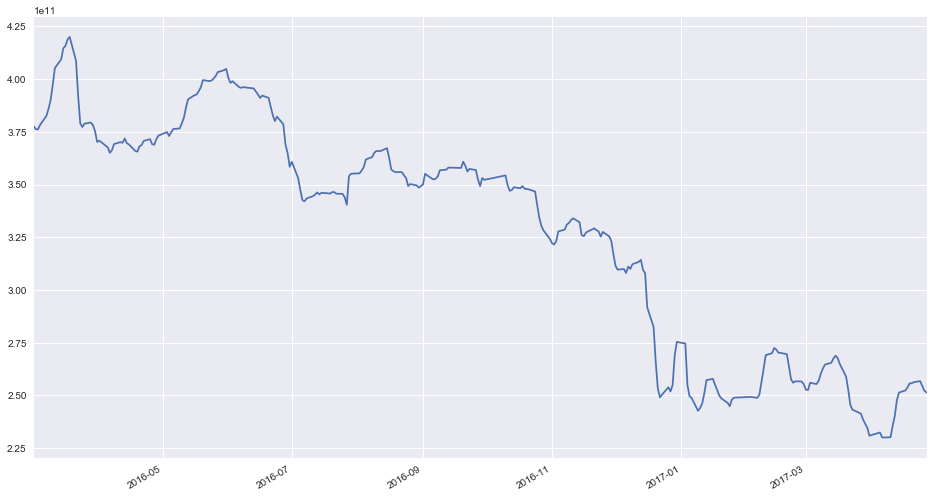

In [41]:
plt.figure(figsize=(16, 9))
df.minor_xs('unit_total').sum(axis=1).plot()